 # Power Load Prediction for West Zone - EDA
 
 

In [65]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [66]:
power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")

In [67]:
power_data_west['End Date Time'] = pd.to_datetime(power_data_west['End Date Time'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['End Date Time'])

In [5]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Usage', 'Avg. Temperature', 'End Date Time'])

In [6]:
plot_df_west['End Date Time'].min()

Timestamp('2019-01-29 00:15:00')

In [7]:
plot_df_west['End Date Time'].max()

Timestamp('2022-01-27 00:00:00')

In [8]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

In [9]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [10]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [11]:
power_data_west.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [12]:
power_data_west.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1161.6,KW,Jan,Thursday,False


In [13]:
power_data_west.describe()

,Usage,Cost,Currency Unit,Avg. Temperature,Peak Demand
count,104724.000000,0.0,0.0,104716.000000,104724.000000
mean,309.636443,NaN,NaN,67.377211,1238.545770
std,75.557612,NaN,NaN,16.591545,302.230457
min,0.000000,NaN,NaN,29.000000,0.000000
25%,252.000000,NaN,NaN,54.000000,1008.000000
50%,308.000000,NaN,NaN,66.000000,1232.000000
75%,368.000000,NaN,NaN,79.000000,1472.000000
max,531.200000,NaN,NaN,114.000000,2124.800000


In [14]:
power_data_west.shape

(104736, 15)

In [15]:
power_data_west.dtypes

Service Agreement            object
Start Date Time              object
End Date Time        datetime64[ns]
Usage                       float64
Usage Unit                   object
Cost                        float64
Currency Unit               float64
Avg. Temperature            float64
Temperature Unit             object
Event Flags                  object
Peak Demand                 float64
Demand Unit                  object
month                        object
day_of_week                  object
holiday                        bool
dtype: object

In [16]:
#For checking missing values in dataset
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                    12
Usage Unit               12
Cost                 104736
Currency Unit        104736
Avg. Temperature         20
Temperature Unit          0
Event Flags          104730
Peak Demand              12
Demand Unit              12
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [17]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                     0
Usage Unit                0
Cost                 104736
Currency Unit        104736
Avg. Temperature          0
Temperature Unit          0
Event Flags            3840
Peak Demand               0
Demand Unit               0
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [20]:
zero_usage_df = power_data_west.loc[power_data_west['Usage'] == 0]
zero_usage_df.count()

Service Agreement    50
Start Date Time      50
End Date Time        50
Usage                50
Usage Unit           50
Cost                  0
Currency Unit         0
Avg. Temperature     50
Temperature Unit     50
Event Flags          50
Peak Demand          50
Demand Unit          50
month                50
day_of_week          50
holiday              50
dtype: int64

dataset.kW.plot()

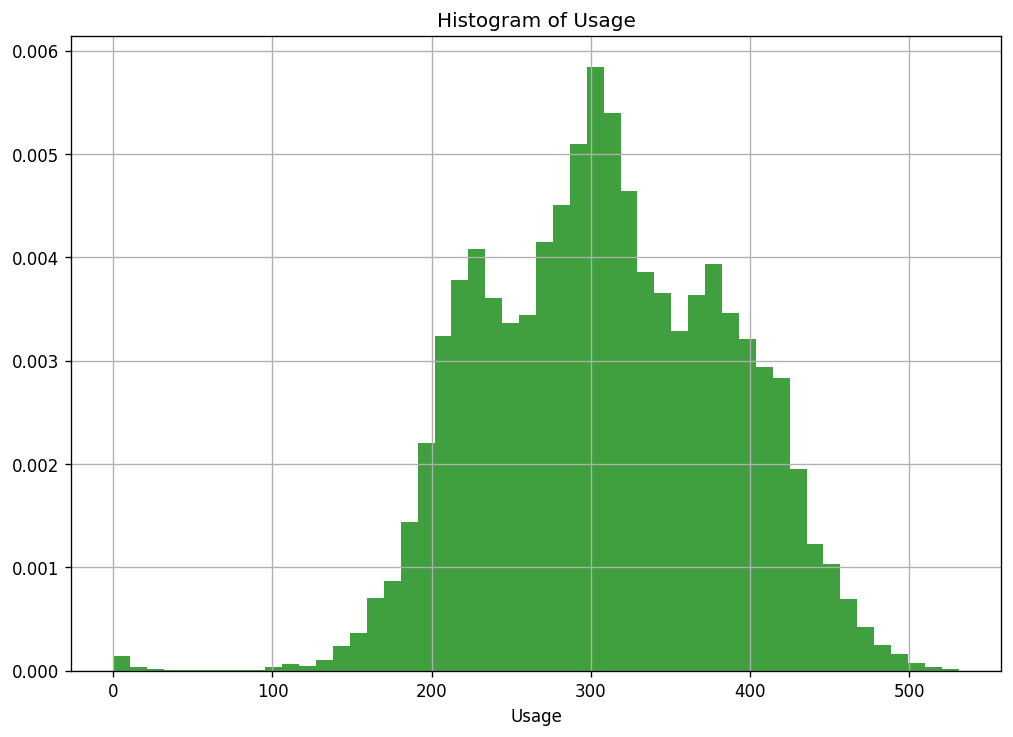

In [18]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west['Usage'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Usage')
plt.title('Histogram of Usage')
plt.grid(True)
plt.show()

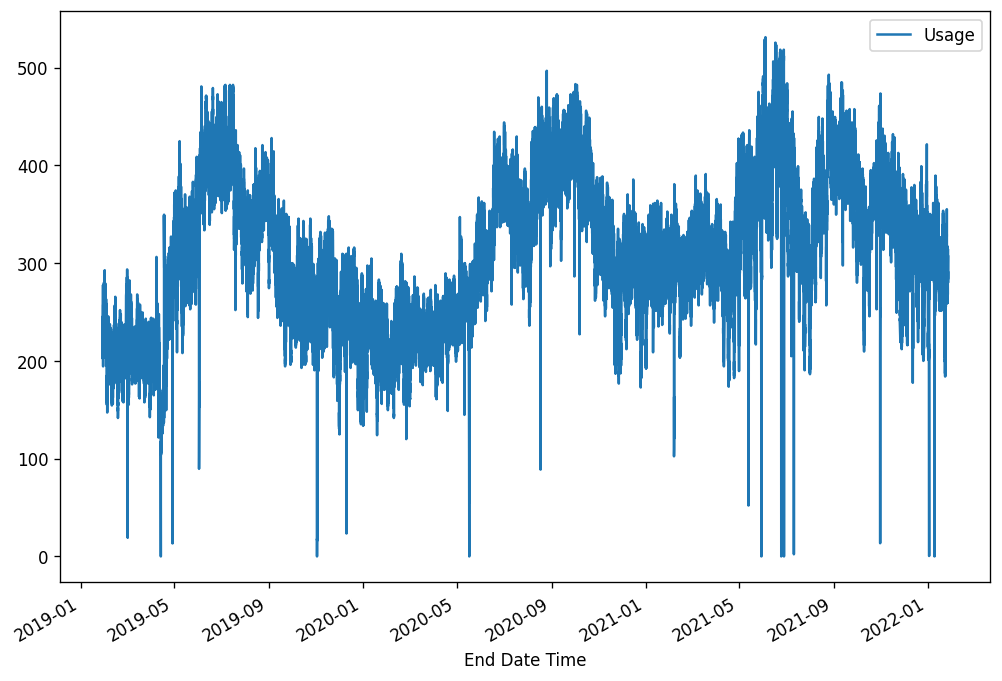

In [60]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Usage', 'Avg. Temperature', 'End Date Time'])
plot_df_west.plot(x='End Date Time', y='Usage', kind='line') 
plt.show()

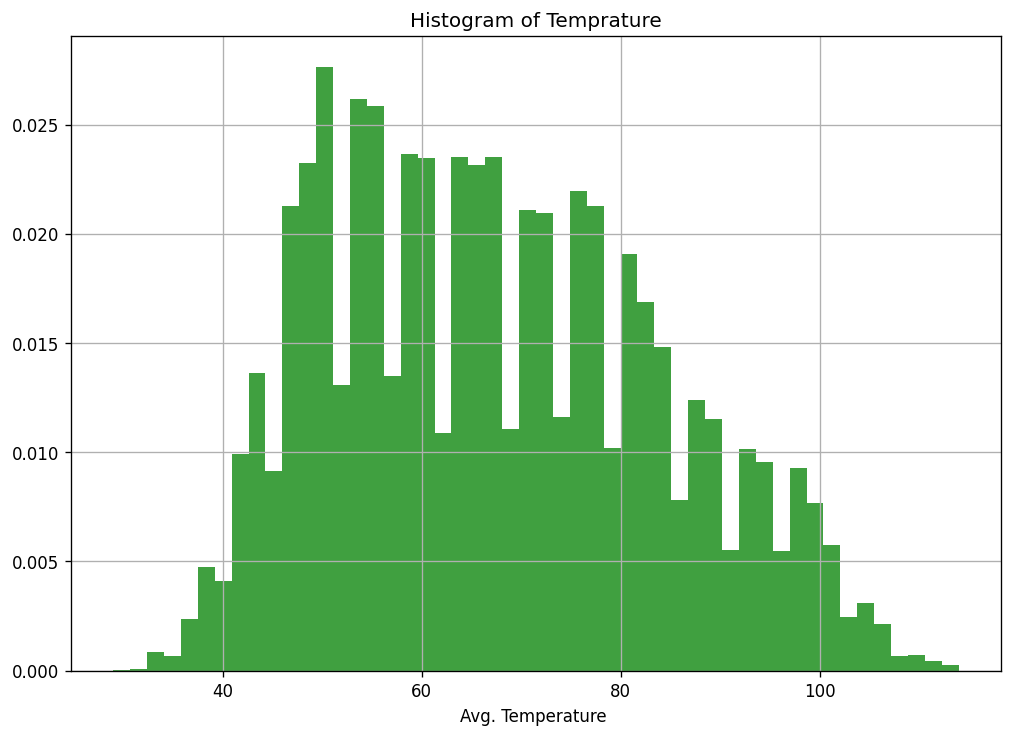

In [22]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west['Avg. Temperature'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Avg. Temperature ')
plt.title('Histogram of Temprature')
plt.grid(True)
plt.show()

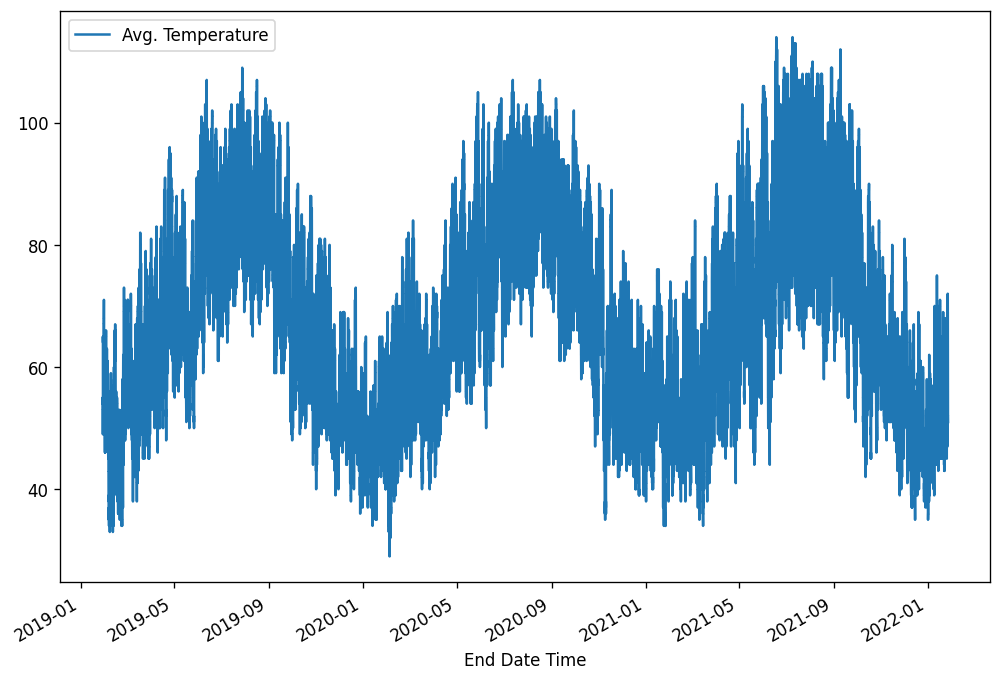

In [23]:
import matplotlib.pyplot as plt
plot_df_west.plot(x='End Date Time', y='Avg. Temperature', kind='line') 
plt.show()

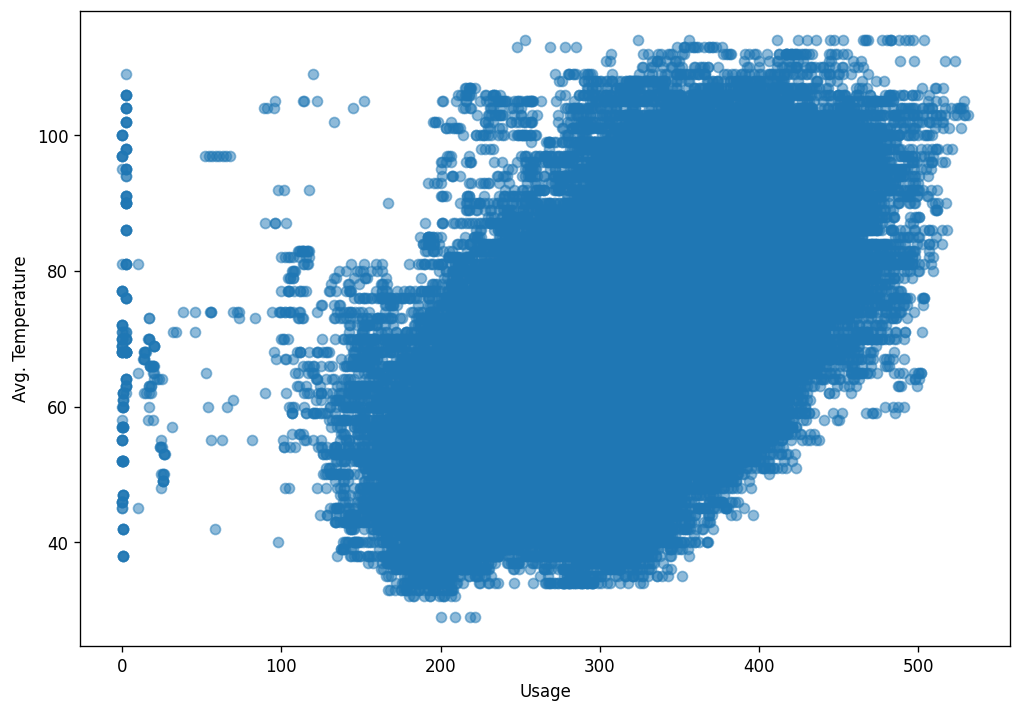

In [59]:
plt.scatter(power_data_west['Usage'], power_data_west['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Usage")
plt.ylabel("Avg. Temperature")
plt.show()

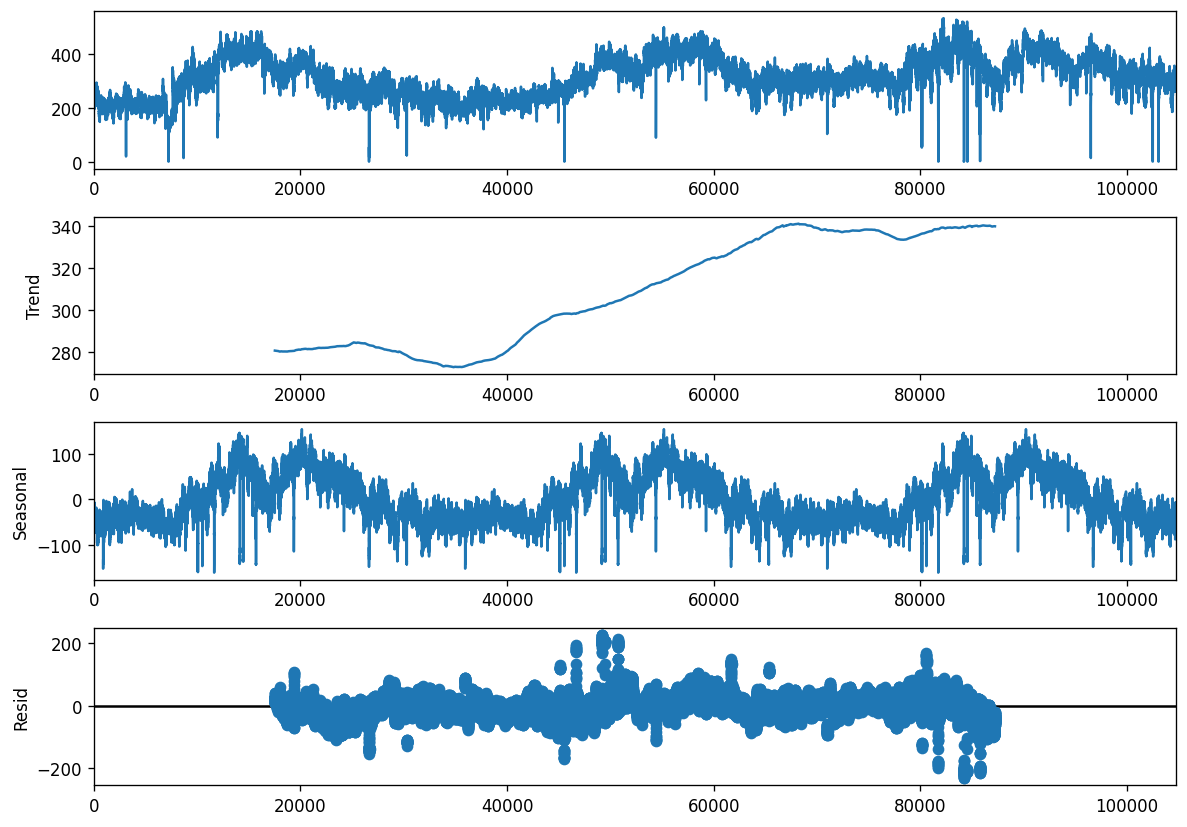

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.DataFrame(power_data_west, columns=['Usage'])
result = seasonal_decompose(series, model='additive', period=35040)
result.plot()
plt.show()

In [25]:
#Number of time_stamp per month
plot_df_west['End Date Time'].dt.month.value_counts()

3     8928
5     8928
7     8928
8     8928
10    8928
12    8832
1     8640
4     8640
6     8640
9     8640
11    8640
2     8064
Name: End Date Time, dtype: int64

<AxesSubplot:>

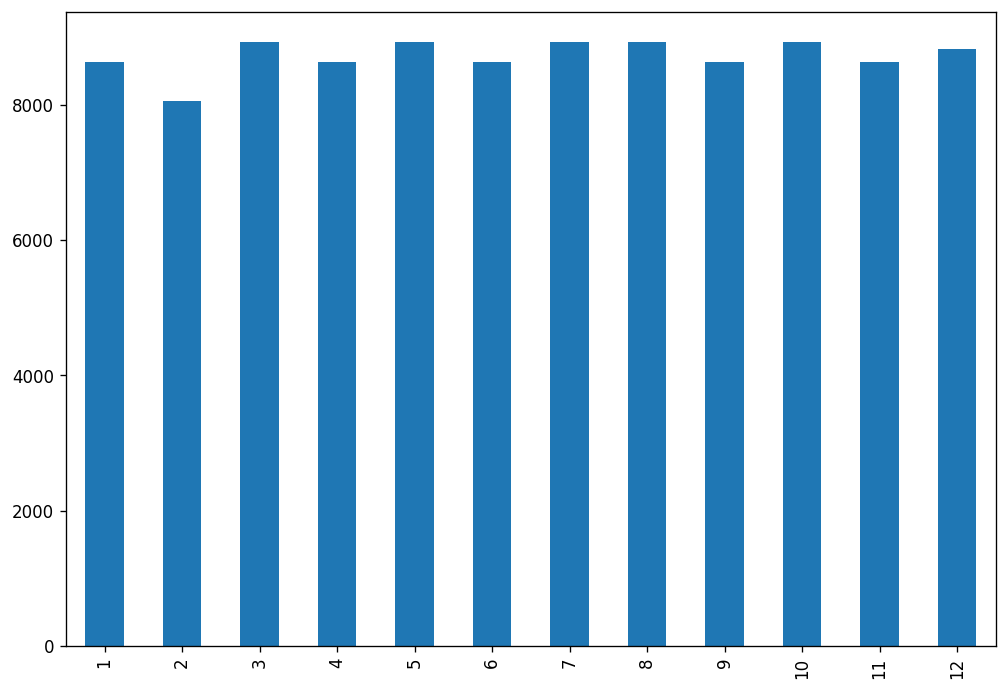

In [61]:
#Line plot of Number of Data points per month
plot_df_west['End Date Time'].dt.month.value_counts().sort_index().plot(kind='bar')

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Usage'>

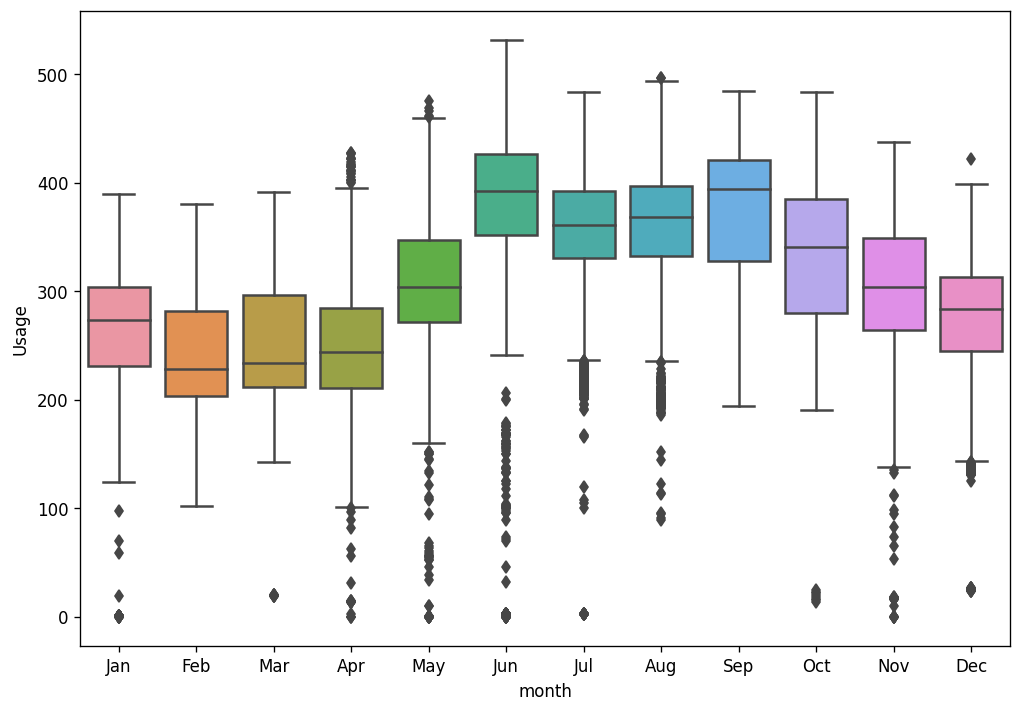

In [27]:
from seaborn import boxplot

boxplot(power_data_west['month'], power_data_west['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Usage'>

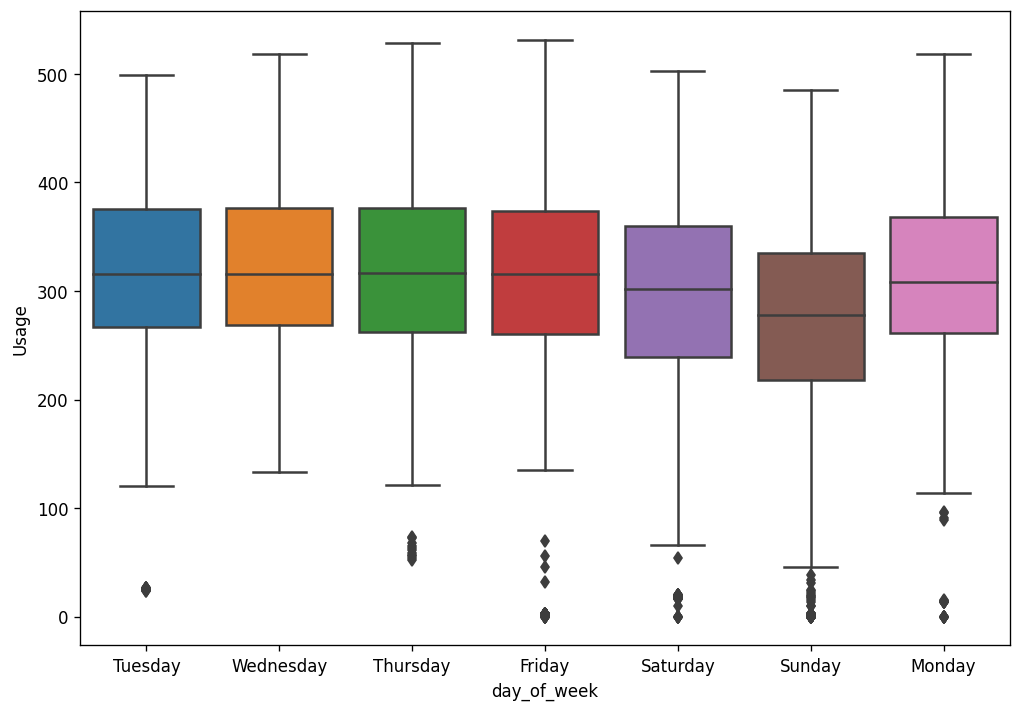

In [28]:
boxplot(power_data_west['day_of_week'], power_data_west['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Usage'>

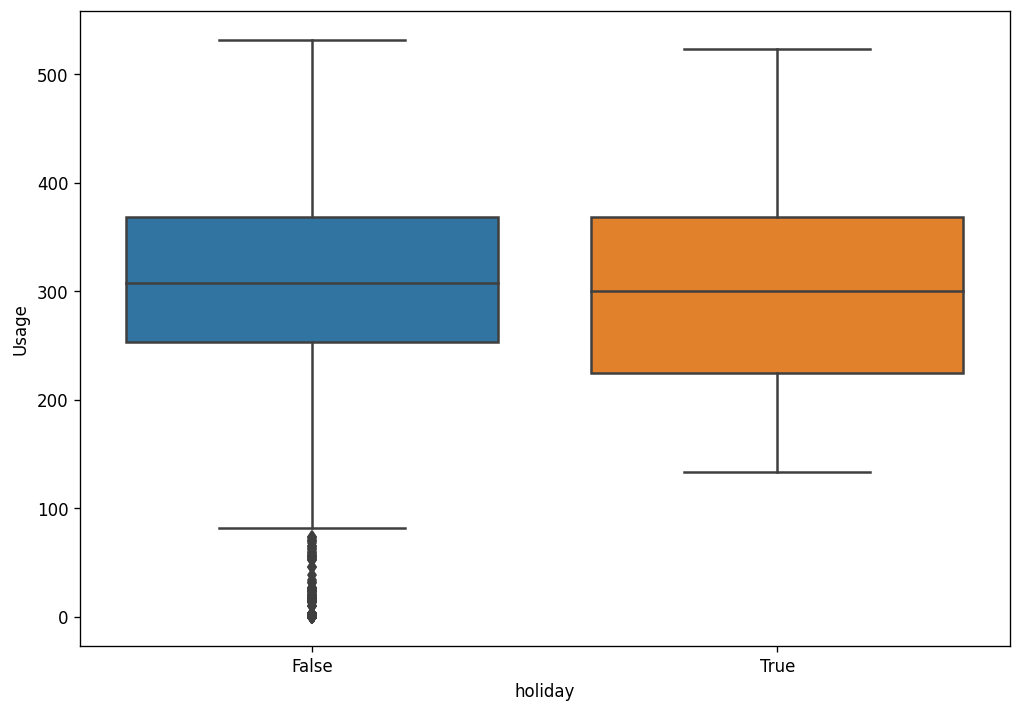

In [29]:
boxplot(power_data_west['holiday'], power_data_west['Usage'])

### 2019 Data Analysis

In [31]:
# Seperate data into years and plot
power_data_west_2019 = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2020-01-01')]
power_data_west_2019.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [32]:
power_data_west_2019.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
32341,west,12/31/19 21:15,2019-12-31 21:30:00,208.8,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,835.2,KW,Dec,Tuesday,False
32342,west,12/31/19 21:30,2019-12-31 21:45:00,208.0,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,832.0,KW,Dec,Tuesday,False
32343,west,12/31/19 21:45,2019-12-31 22:00:00,200.0,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,800.0,KW,Dec,Tuesday,False
32344,west,12/31/19 22:00,2019-12-31 22:15:00,189.6,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,758.4,KW,Dec,Tuesday,False
32345,west,12/31/19 22:15,2019-12-31 22:30:00,184.0,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,736.0,KW,Dec,Tuesday,False
32346,west,12/31/19 22:30,2019-12-31 22:45:00,180.0,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,720.0,KW,Dec,Tuesday,False
32347,west,12/31/19 22:45,2019-12-31 23:00:00,171.2,KWH,NaN,NaN,49.0,FAHRENHEIT,Daylight Savings,684.8,KW,Dec,Tuesday,False
32348,west,12/31/19 23:00,2019-12-31 23:15:00,170.4,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,681.6,KW,Dec,Tuesday,False
32349,west,12/31/19 23:15,2019-12-31 23:30:00,165.6,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,662.4,KW,Dec,Tuesday,False
32350,west,12/31/19 23:30,2019-12-31 23:45:00,165.6,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,662.4,KW,Dec,Tuesday,False


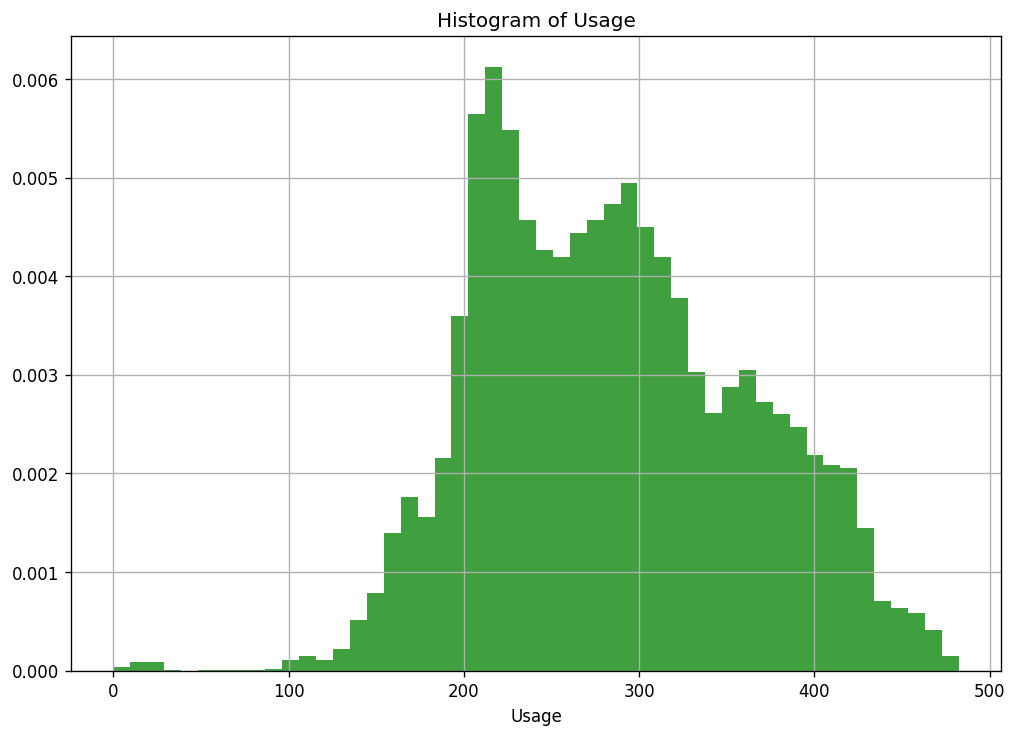

In [33]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_2019['Usage'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Usage')
plt.title('Histogram of Usage')
plt.grid(True)
plt.show()

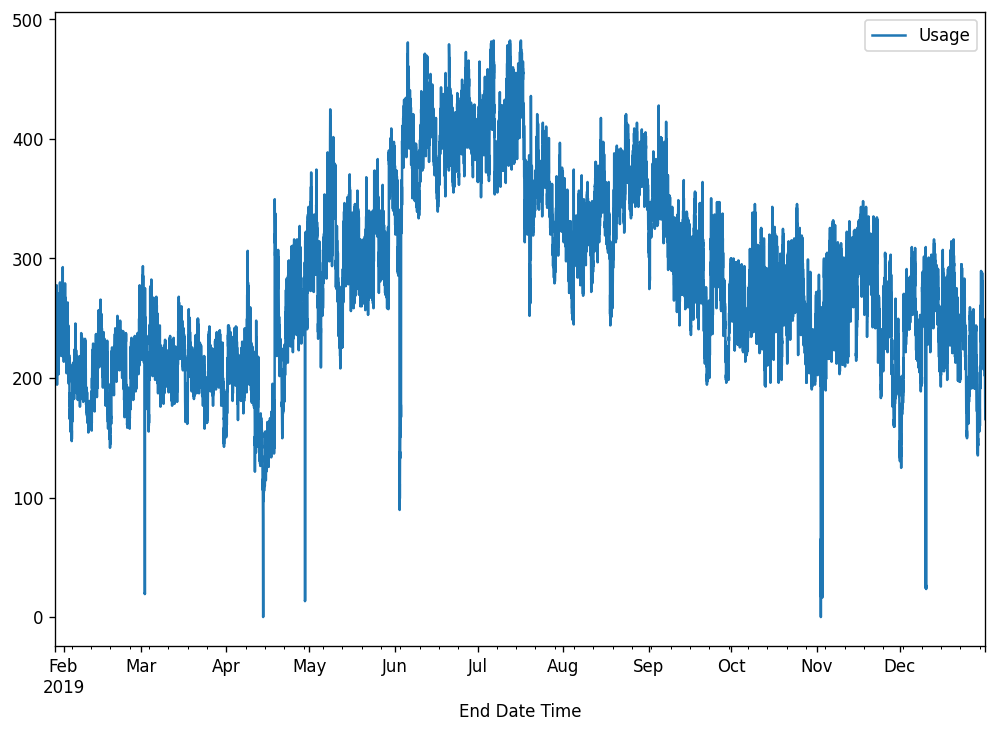

In [34]:
plot_df_west_2019 = pd.DataFrame(power_data_west_2019, columns=['Usage', 'Avg. Temperature', 'End Date Time'])
plot_df_west_2019.plot(x='End Date Time', y='Usage', kind='line') 
plt.show()

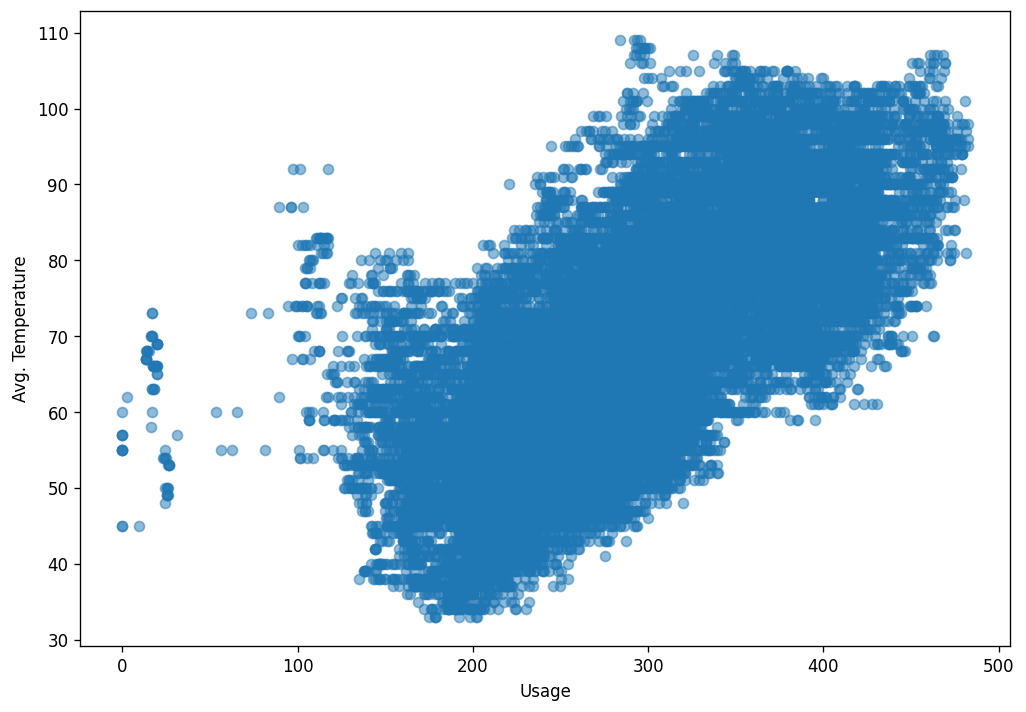

In [62]:
plt.scatter(power_data_west_2019['Usage'], power_data_west_2019['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Usage")
plt.ylabel("Avg. Temperature")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Usage'>

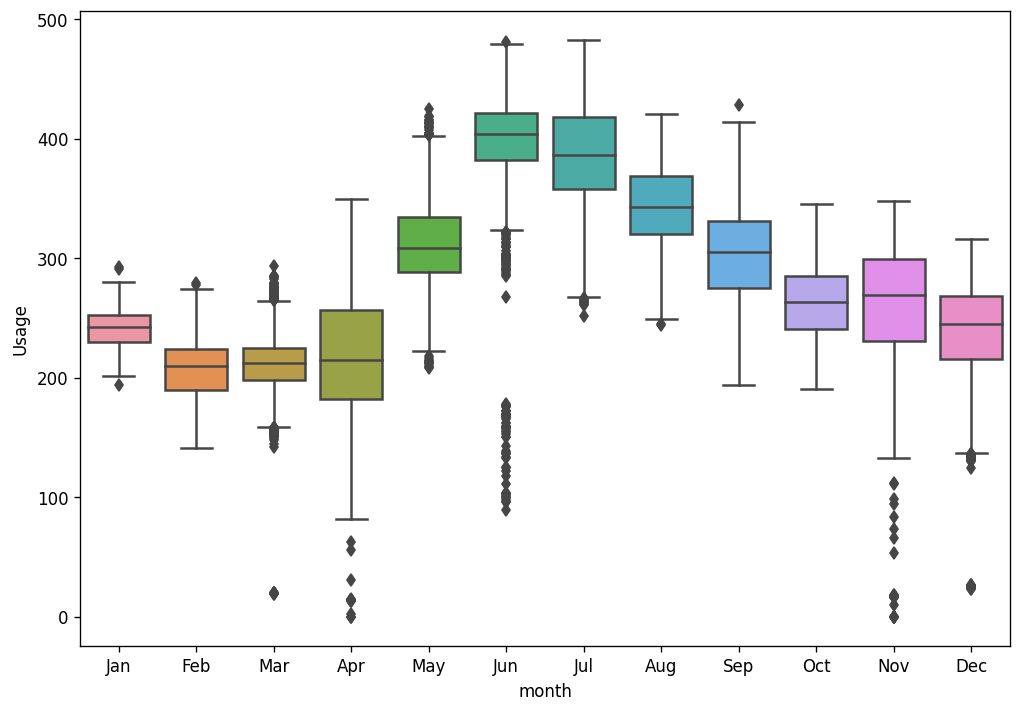

In [35]:
boxplot(power_data_west_2019['month'], power_data_west_2019['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Usage'>

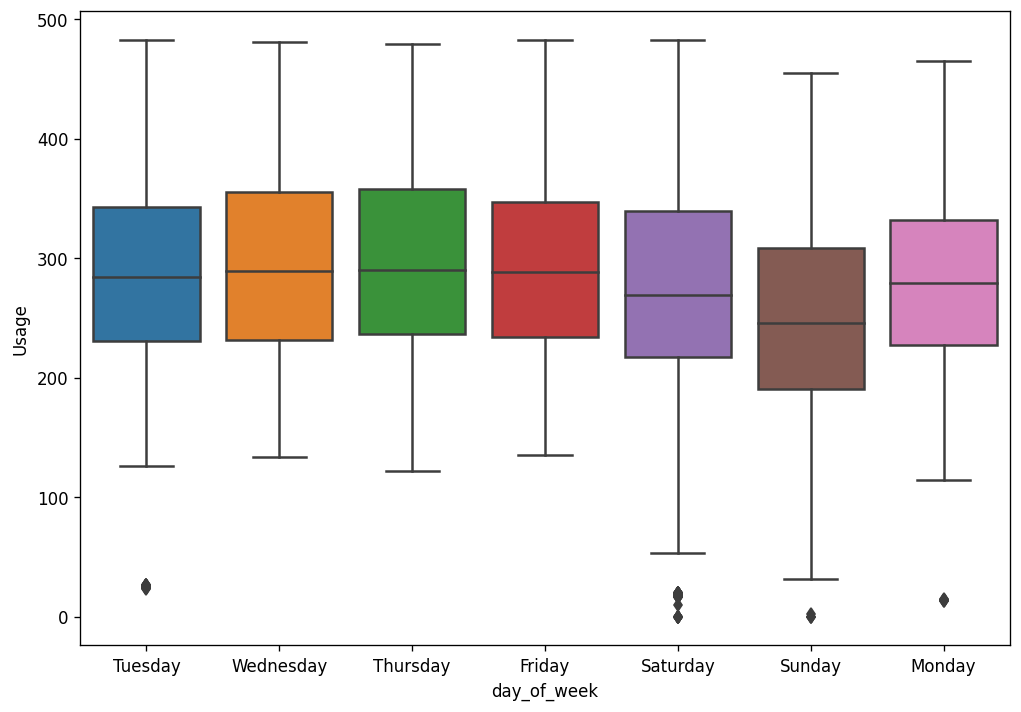

In [36]:
boxplot(power_data_west_2019['day_of_week'], power_data_west_2019['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Usage'>

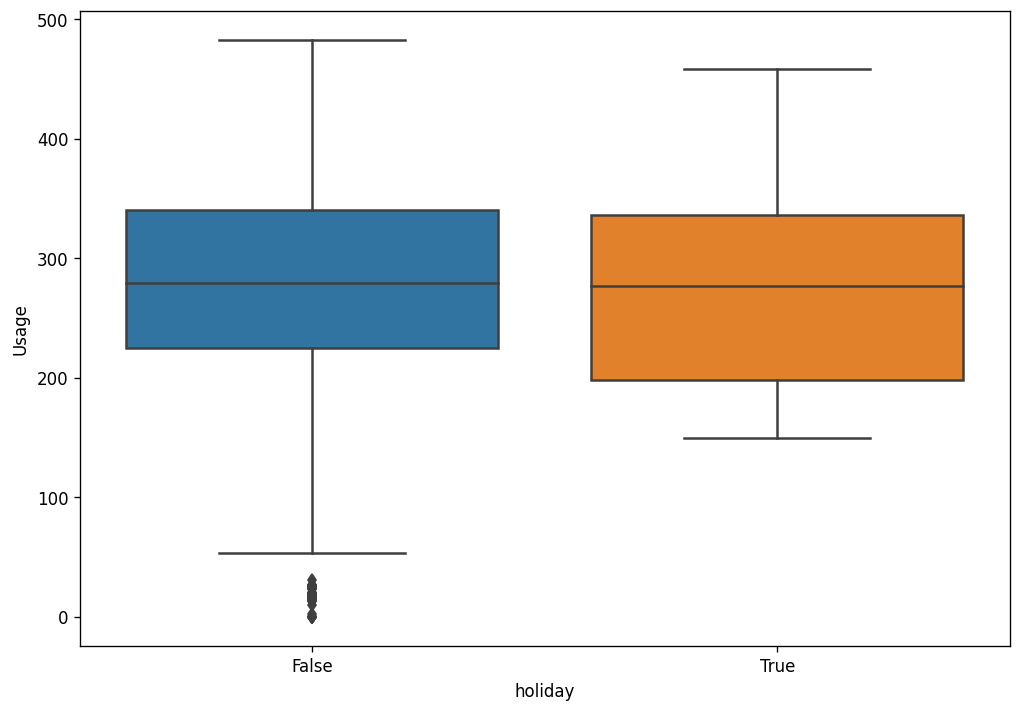

In [38]:
boxplot(power_data_west_2019['holiday'], power_data_west_2019['Usage'])

### 2020 Data Analysis

In [40]:
power_data_west_2020 = power_data_west[(power_data_west['End Date Time'] > '2020-01-01') & (power_data_west['End Date Time'] < '2021-01-01')]
power_data_west_2020.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
32352,west,1/1/20 0:00,2020-01-01 00:15:00,147.2,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,588.8,KW,Jan,Wednesday,True
32353,west,1/1/20 0:15,2020-01-01 00:30:00,142.4,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,569.6,KW,Jan,Wednesday,True
32354,west,1/1/20 0:30,2020-01-01 00:45:00,140.0,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,560.0,KW,Jan,Wednesday,True
32355,west,1/1/20 0:45,2020-01-01 01:00:00,138.4,KWH,NaN,NaN,46.0,FAHRENHEIT,Daylight Savings,553.6,KW,Jan,Wednesday,True
32356,west,1/1/20 1:00,2020-01-01 01:15:00,136.0,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,544.0,KW,Jan,Wednesday,True
32357,west,1/1/20 1:15,2020-01-01 01:30:00,136.0,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,544.0,KW,Jan,Wednesday,True
32358,west,1/1/20 1:30,2020-01-01 01:45:00,134.4,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,537.6,KW,Jan,Wednesday,True
32359,west,1/1/20 1:45,2020-01-01 02:00:00,134.4,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,537.6,KW,Jan,Wednesday,True
32360,west,1/1/20 2:00,2020-01-01 02:15:00,134.4,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,537.6,KW,Jan,Wednesday,True
32361,west,1/1/20 2:15,2020-01-01 02:30:00,133.6,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,534.4,KW,Jan,Wednesday,True


In [41]:
power_data_west_2020.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
67477,west,12/31/20 21:15,2020-12-31 21:30:00,217.6,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,870.4,KW,Dec,Thursday,False
67478,west,12/31/20 21:30,2020-12-31 21:45:00,213.6,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,854.4,KW,Dec,Thursday,False
67479,west,12/31/20 21:45,2020-12-31 22:00:00,208.0,KWH,NaN,NaN,45.0,FAHRENHEIT,Daylight Savings,832.0,KW,Dec,Thursday,False
67480,west,12/31/20 22:00,2020-12-31 22:15:00,196.0,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,784.0,KW,Dec,Thursday,False
67481,west,12/31/20 22:15,2020-12-31 22:30:00,202.4,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,809.6,KW,Dec,Thursday,False
67482,west,12/31/20 22:30,2020-12-31 22:45:00,205.6,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,822.4,KW,Dec,Thursday,False
67483,west,12/31/20 22:45,2020-12-31 23:00:00,199.2,KWH,NaN,NaN,44.0,FAHRENHEIT,Daylight Savings,796.8,KW,Dec,Thursday,False
67484,west,12/31/20 23:00,2020-12-31 23:15:00,197.6,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,790.4,KW,Dec,Thursday,False
67485,west,12/31/20 23:15,2020-12-31 23:30:00,207.2,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,828.8,KW,Dec,Thursday,False
67486,west,12/31/20 23:30,2020-12-31 23:45:00,198.4,KWH,NaN,NaN,43.0,FAHRENHEIT,Daylight Savings,793.6,KW,Dec,Thursday,False


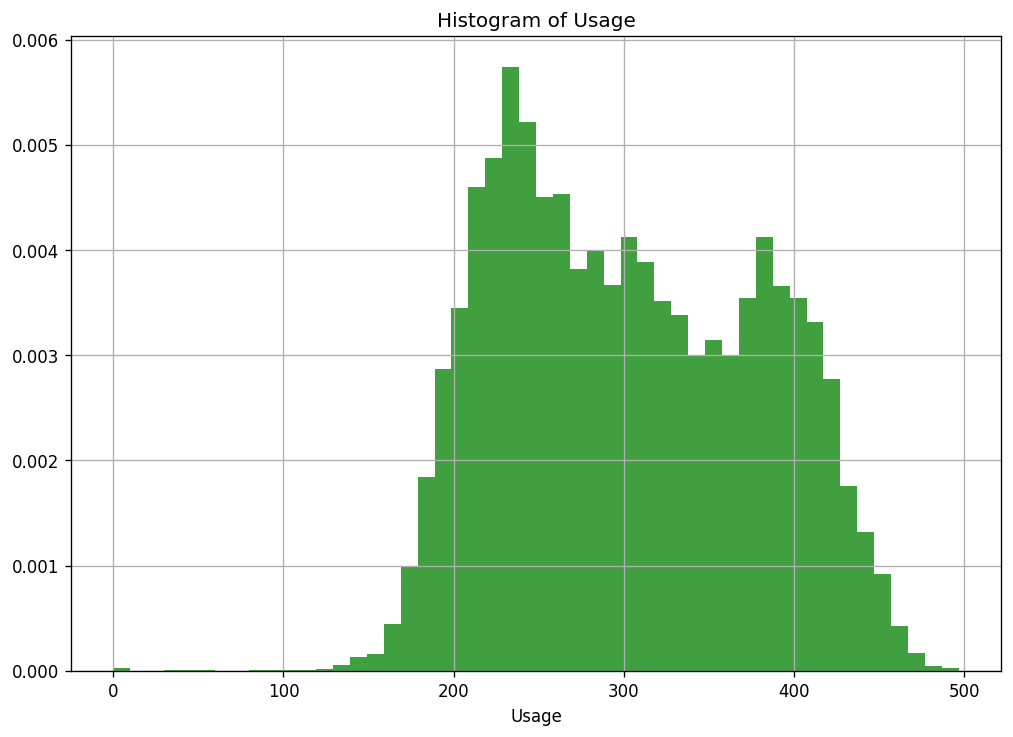

In [42]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_2020['Usage'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Usage')
plt.title('Histogram of Usage')
plt.grid(True)
plt.show()

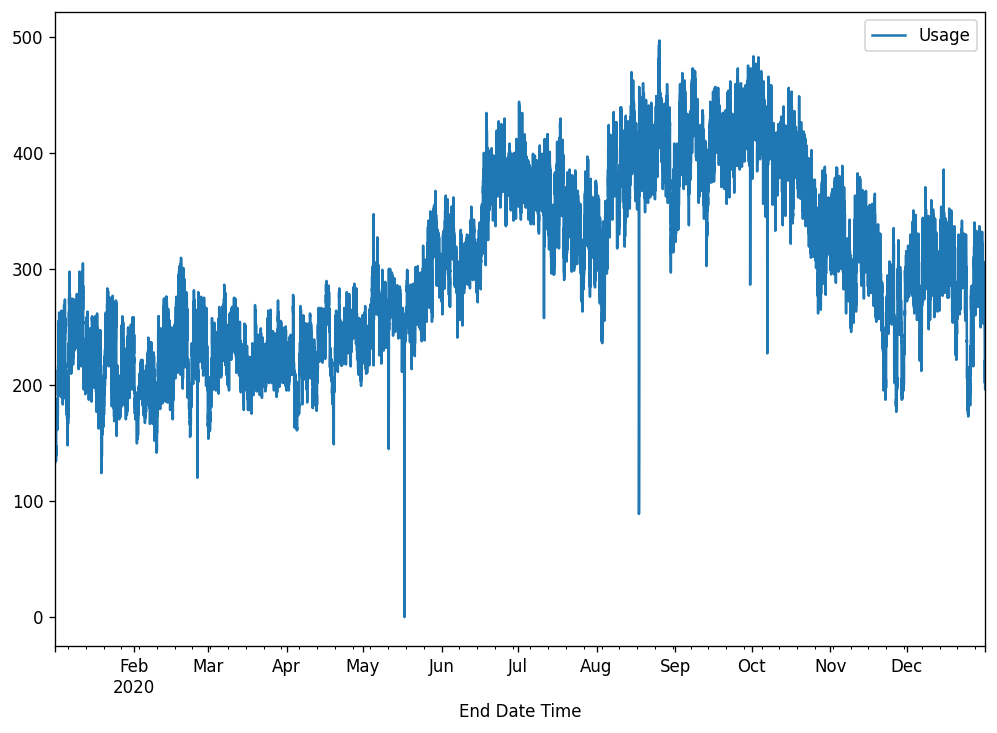

In [44]:
plot_df_west_2020 = pd.DataFrame(power_data_west_2020, columns=['Usage', 'Avg. Temperature', 'End Date Time'])
plot_df_west_2020.plot(x='End Date Time', y='Usage', kind='line') 
plt.show()

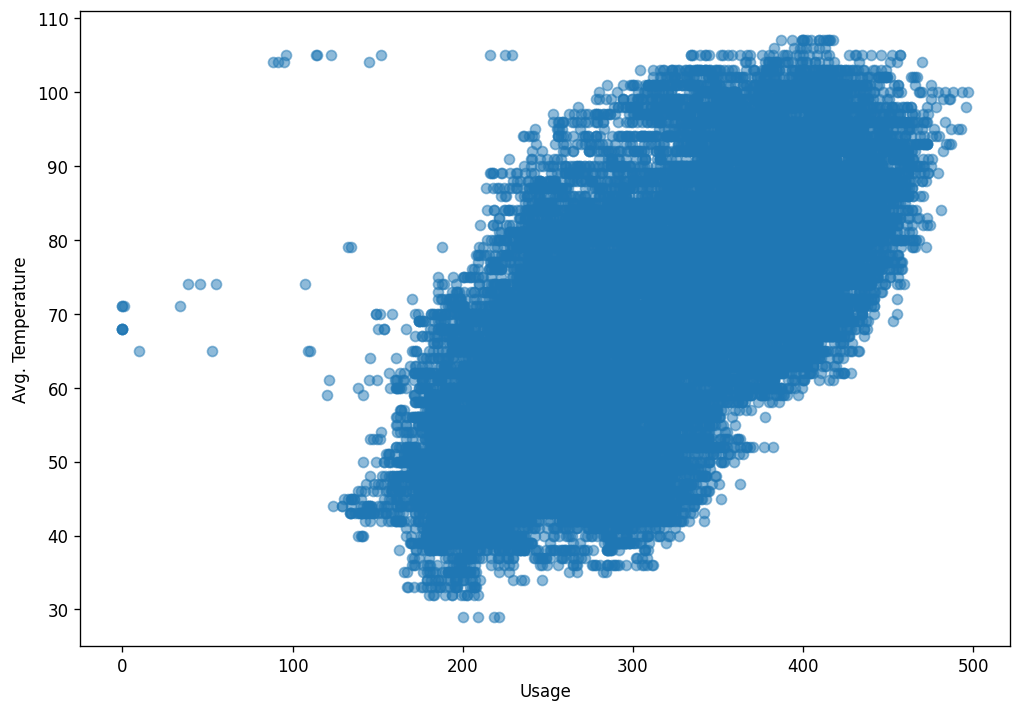

In [63]:
plt.scatter(power_data_west_2020['Usage'], power_data_west_2020['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Usage")
plt.ylabel("Avg. Temperature")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Usage'>

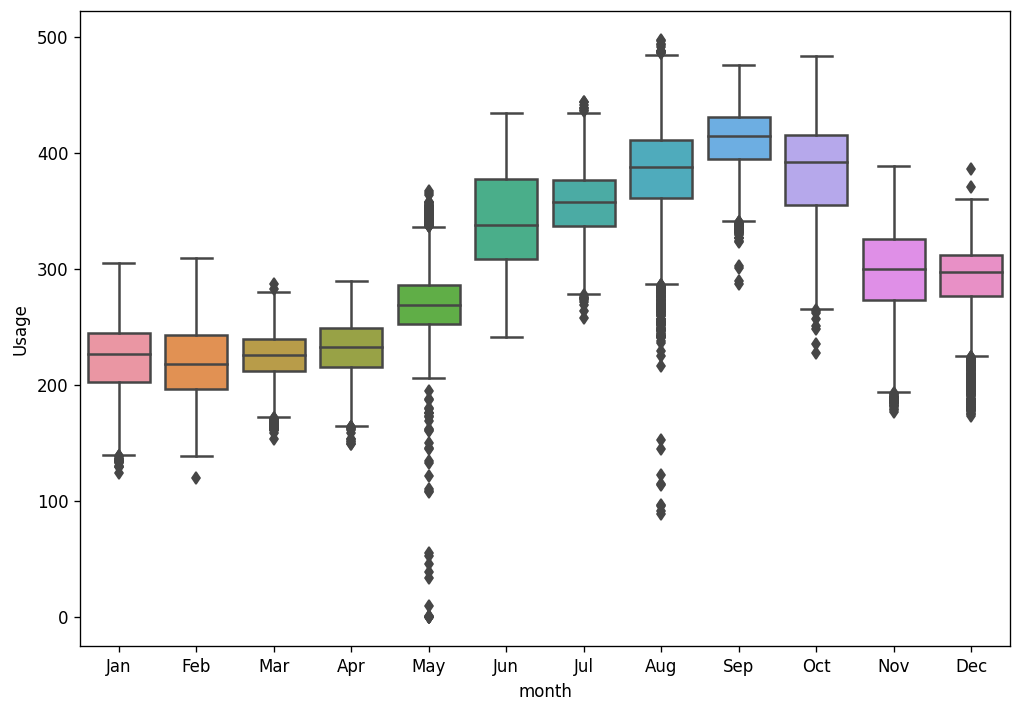

In [46]:
boxplot(power_data_west_2020['month'], power_data_west_2020['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Usage'>

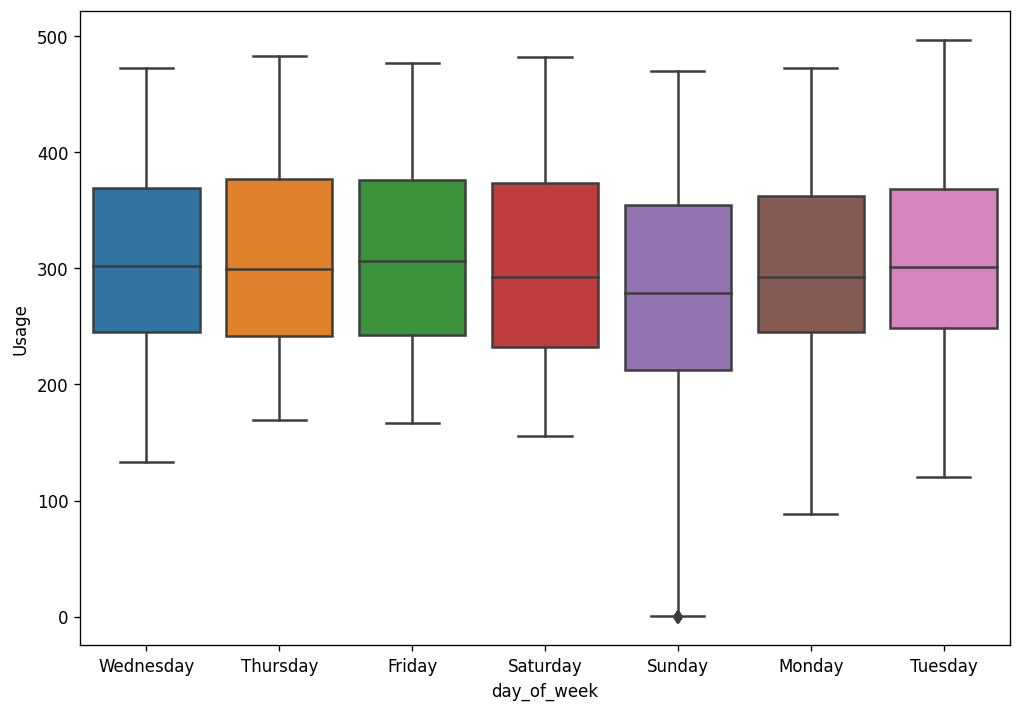

In [47]:
boxplot(power_data_west_2020['day_of_week'], power_data_west_2020['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Usage'>

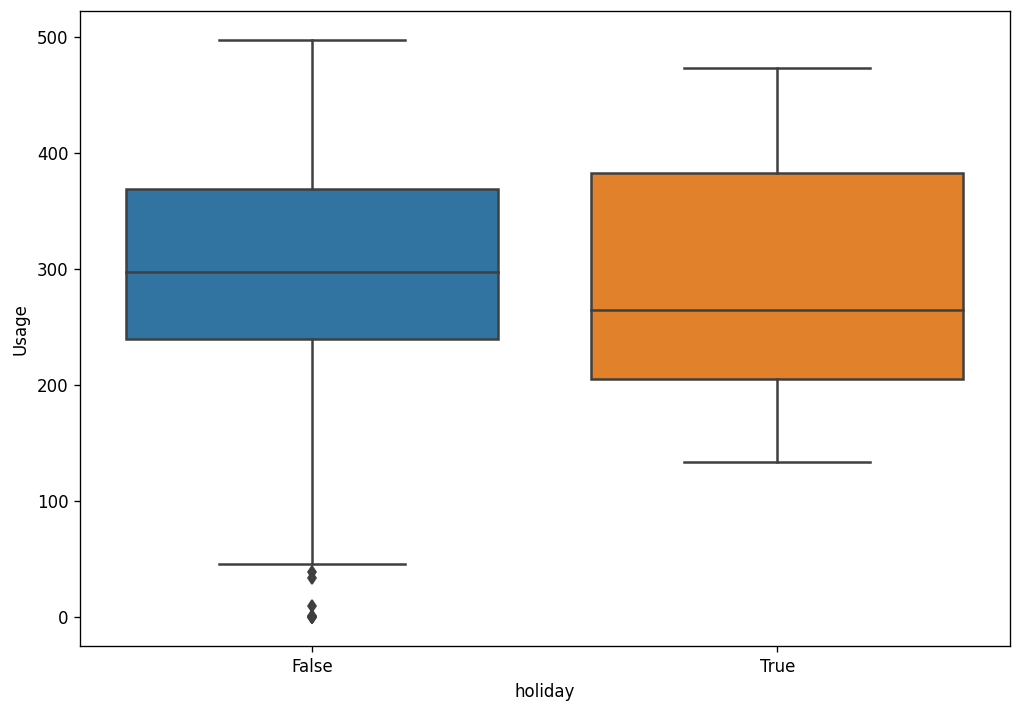

In [48]:
boxplot(power_data_west_2020['holiday'], power_data_west_2020['Usage'])

### 2021 Data Analysis

In [49]:
power_data_west_2021 = power_data_west[(power_data_west['End Date Time'] > '2021-01-01') & (power_data_west['End Date Time'] < '2022-01-01')]

power_data_west_2021.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
67488,west,1/1/21 0:00,2021-01-01 00:15:00,203.2,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,812.8,KW,Jan,Friday,True
67489,west,1/1/21 0:15,2021-01-01 00:30:00,200.0,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,800.0,KW,Jan,Friday,True
67490,west,1/1/21 0:30,2021-01-01 00:45:00,210.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,841.6,KW,Jan,Friday,True
67491,west,1/1/21 0:45,2021-01-01 01:00:00,205.6,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,822.4,KW,Jan,Friday,True
67492,west,1/1/21 1:00,2021-01-01 01:15:00,198.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,793.6,KW,Jan,Friday,True
67493,west,1/1/21 1:15,2021-01-01 01:30:00,207.2,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,828.8,KW,Jan,Friday,True
67494,west,1/1/21 1:30,2021-01-01 01:45:00,204.0,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,816.0,KW,Jan,Friday,True
67495,west,1/1/21 1:45,2021-01-01 02:00:00,198.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,793.6,KW,Jan,Friday,True
67496,west,1/1/21 2:00,2021-01-01 02:15:00,202.4,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,809.6,KW,Jan,Friday,True
67497,west,1/1/21 2:15,2021-01-01 02:30:00,199.2,KWH,NaN,NaN,40.0,FAHRENHEIT,Daylight Savings,796.8,KW,Jan,Friday,True


In [50]:
power_data_west_2021.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
102325,west,12/31/21 21:15,2021-12-31 21:30:00,236.8,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,947.2,KW,Dec,Friday,True
102326,west,12/31/21 21:30,2021-12-31 21:45:00,240.8,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,963.2,KW,Dec,Friday,True
102327,west,12/31/21 21:45,2021-12-31 22:00:00,245.6,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,982.4,KW,Dec,Friday,True
102328,west,12/31/21 22:00,2021-12-31 22:15:00,234.4,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,937.6,KW,Dec,Friday,True
102329,west,12/31/21 22:15,2021-12-31 22:30:00,226.4,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,905.6,KW,Dec,Friday,True
102330,west,12/31/21 22:30,2021-12-31 22:45:00,232.8,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,931.2,KW,Dec,Friday,True
102331,west,12/31/21 22:45,2021-12-31 23:00:00,238.4,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,953.6,KW,Dec,Friday,True
102332,west,12/31/21 23:00,2021-12-31 23:15:00,224.0,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,896.0,KW,Dec,Friday,True
102333,west,12/31/21 23:15,2021-12-31 23:30:00,217.6,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,870.4,KW,Dec,Friday,True
102334,west,12/31/21 23:30,2021-12-31 23:45:00,223.2,KWH,NaN,NaN,41.0,FAHRENHEIT,Daylight Savings,892.8,KW,Dec,Friday,True


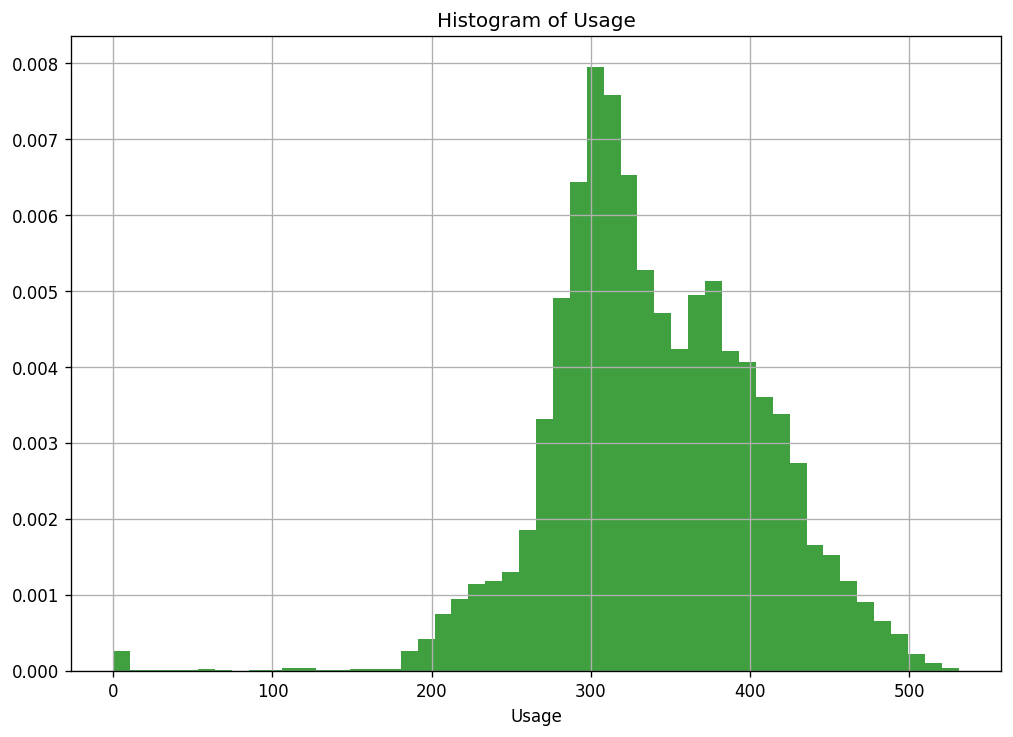

In [51]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_2021['Usage'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Usage')
plt.title('Histogram of Usage')
plt.grid(True)
plt.show()

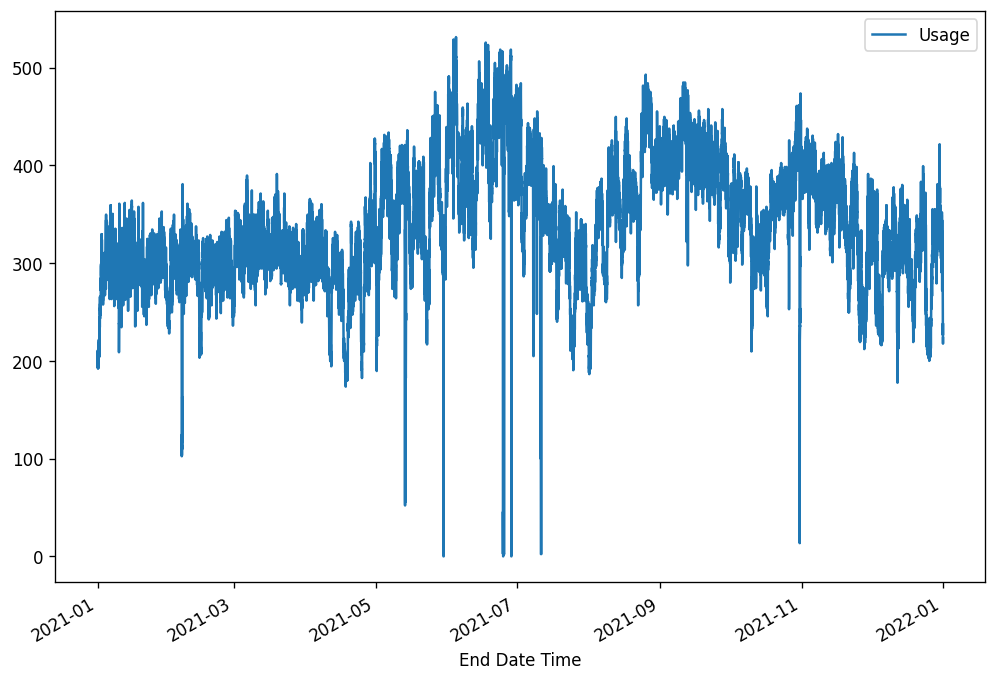

In [52]:
plot_df_west_2021 = pd.DataFrame(power_data_west_2021, columns=['Usage', 'Avg. Temperature', 'End Date Time'])
plot_df_west_2021.plot(x='End Date Time', y='Usage', kind='line') 
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Usage'>

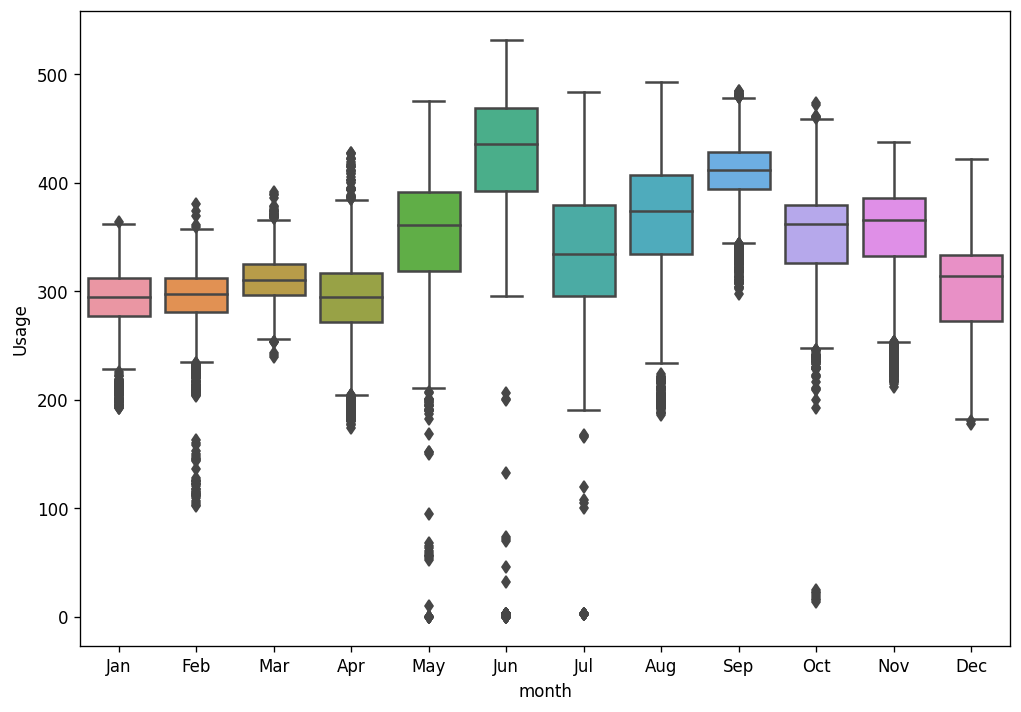

In [53]:
boxplot(power_data_west_2021['month'], power_data_west_2021['Usage'])

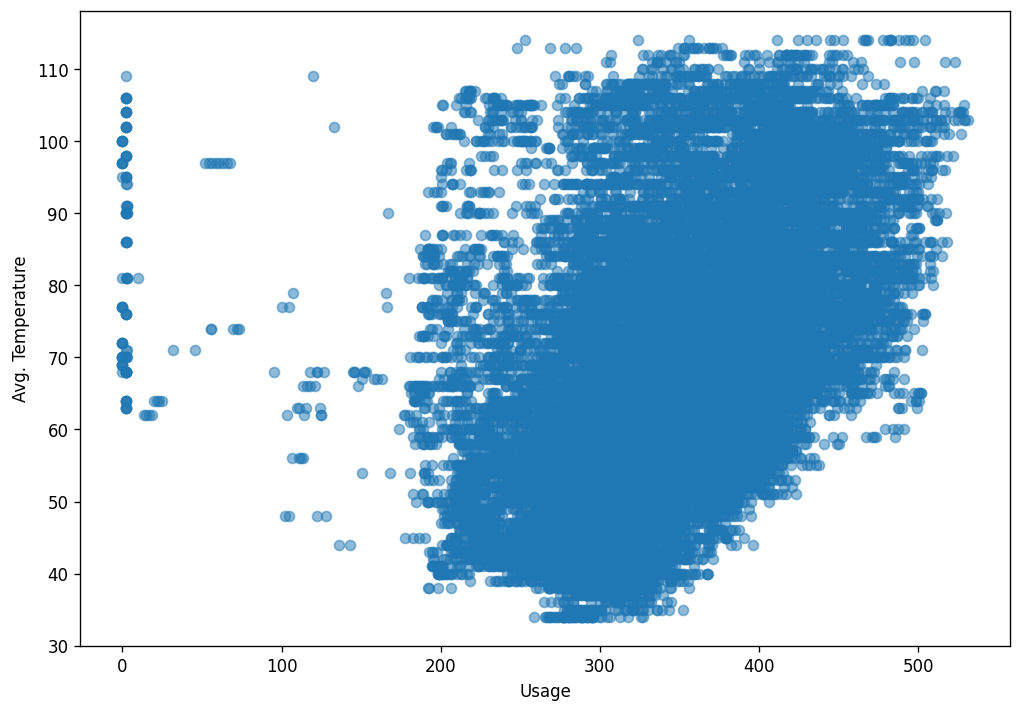

In [64]:
plt.scatter(power_data_west_2021['Usage'], power_data_west_2021['Avg. Temperature'],  alpha=0.5)
plt.xlabel("Usage")
plt.ylabel("Avg. Temperature")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='Usage'>

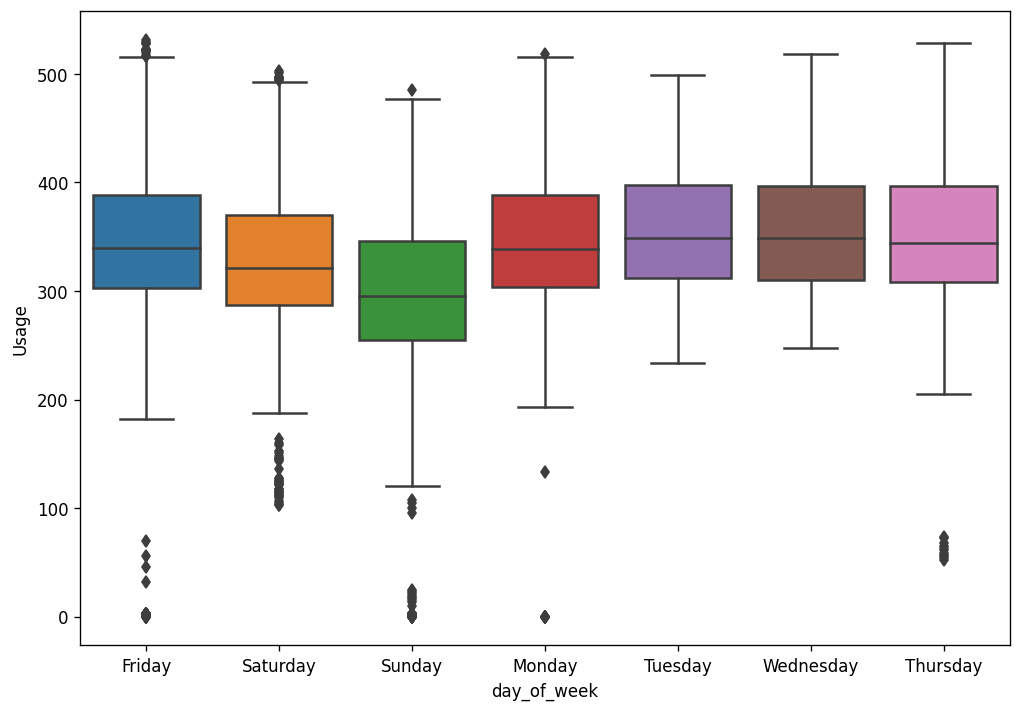

In [54]:
boxplot(power_data_west_2021['day_of_week'], power_data_west_2021['Usage'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='Usage'>

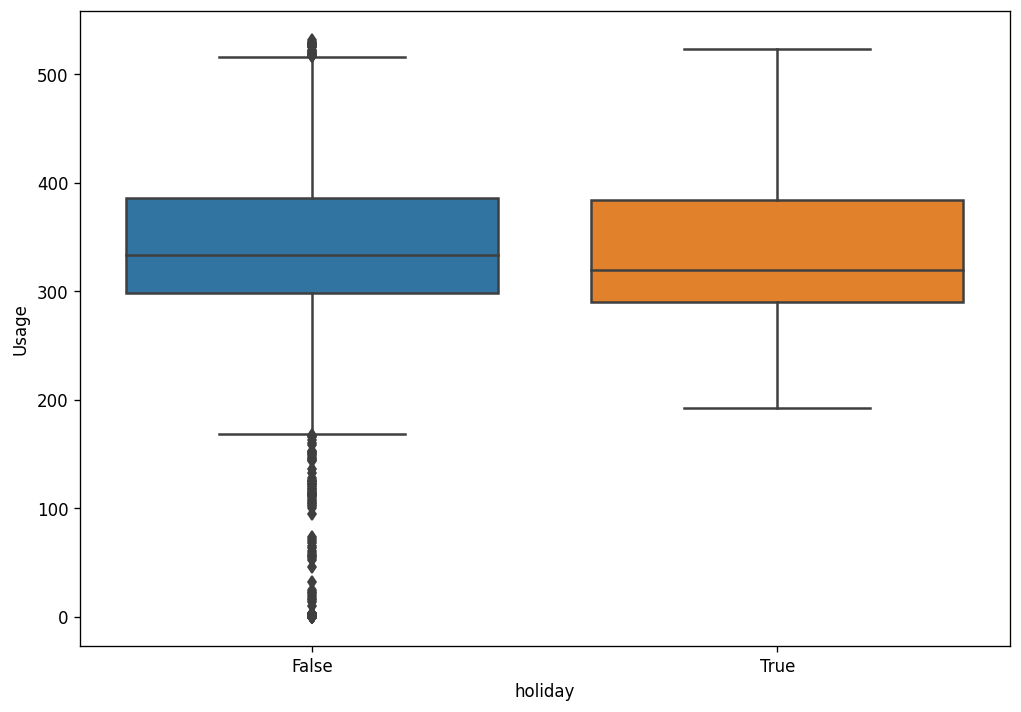

In [55]:
boxplot(power_data_west_2021['holiday'], power_data_west_2021['Usage'])